In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from dtuimldmtools import similarity

from utils.read_dataset import read

dataset = pd.read_csv("../Life-Expectancy-Data.csv")

raw_data = dataset.values

cols = range(0, 21)
X = raw_data[:, cols]
attributeNames = np.asarray(dataset.columns[cols])
dataset

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.320,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.350,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.570,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.680,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.890,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,...,34,0.49,399,11.33,12.8,12.9,1.1,0,1,49.9
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,...,95,0.02,2515,2.67,2.2,2.3,9.1,0,1,66.9
2861,Sri Lanka,Asia,2004,17.7,28.9,134.8950,1.560,62,95,21.9,...,97,0.02,2130,19.39,15.4,15.5,10.3,0,1,74.3
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.000,94,95,26.1,...,95,0.05,7424,3.44,3.3,3.3,11.1,1,0,71.8


In [5]:
non_continous_data = ["Country","Region"]


continuousData = dataset[[col for col in dataset.columns if col not in non_continous_data]]
continuousData

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,2015,11.1,13.0,105.8240,1.320,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,2015,2.7,3.3,57.9025,10.350,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,2007,51.5,67.9,201.0765,1.570,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,2006,32.8,40.5,222.1965,5.680,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,2012,3.4,4.3,57.9510,2.890,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,2000,97.0,224.9,291.8240,0.092,72,64,20.8,41,34,0.49,399,11.33,12.8,12.9,1.1,0,1,49.9
2860,2009,23.9,28.6,235.2330,6.560,97,97,25.3,96,95,0.02,2515,2.67,2.2,2.3,9.1,0,1,66.9
2861,2004,17.7,28.9,134.8950,1.560,62,95,21.9,97,97,0.02,2130,19.39,15.4,15.5,10.3,0,1,74.3
2862,2002,7.9,9.9,204.0120,11.000,94,95,26.1,97,95,0.05,7424,3.44,3.3,3.3,11.1,1,0,71.8


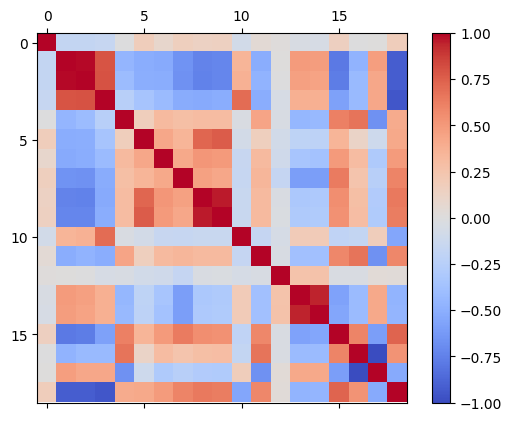

In [6]:


#s = similarity(continuousData,continuousData, "cos")


corr = continuousData.corr()

fig, ax = plt.subplots()
cax = ax.matshow(corr, cmap='coolwarm')



fig.colorbar(cax)

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')
      Infant_deaths  Under_five_deaths  Adult_mortality  Alcohol_consumption  \
0              11.1               13.0         105.8240                1.320   
1               2.7                3.3          57.9025               10.350   
2              51.5               67.9         201.0765                1.570   
3              32.8               40.5         222.1965                5.680   
4               3.4                4.3          57.9510                2.890   
...             ...                ...              ...                  ...   
2859     

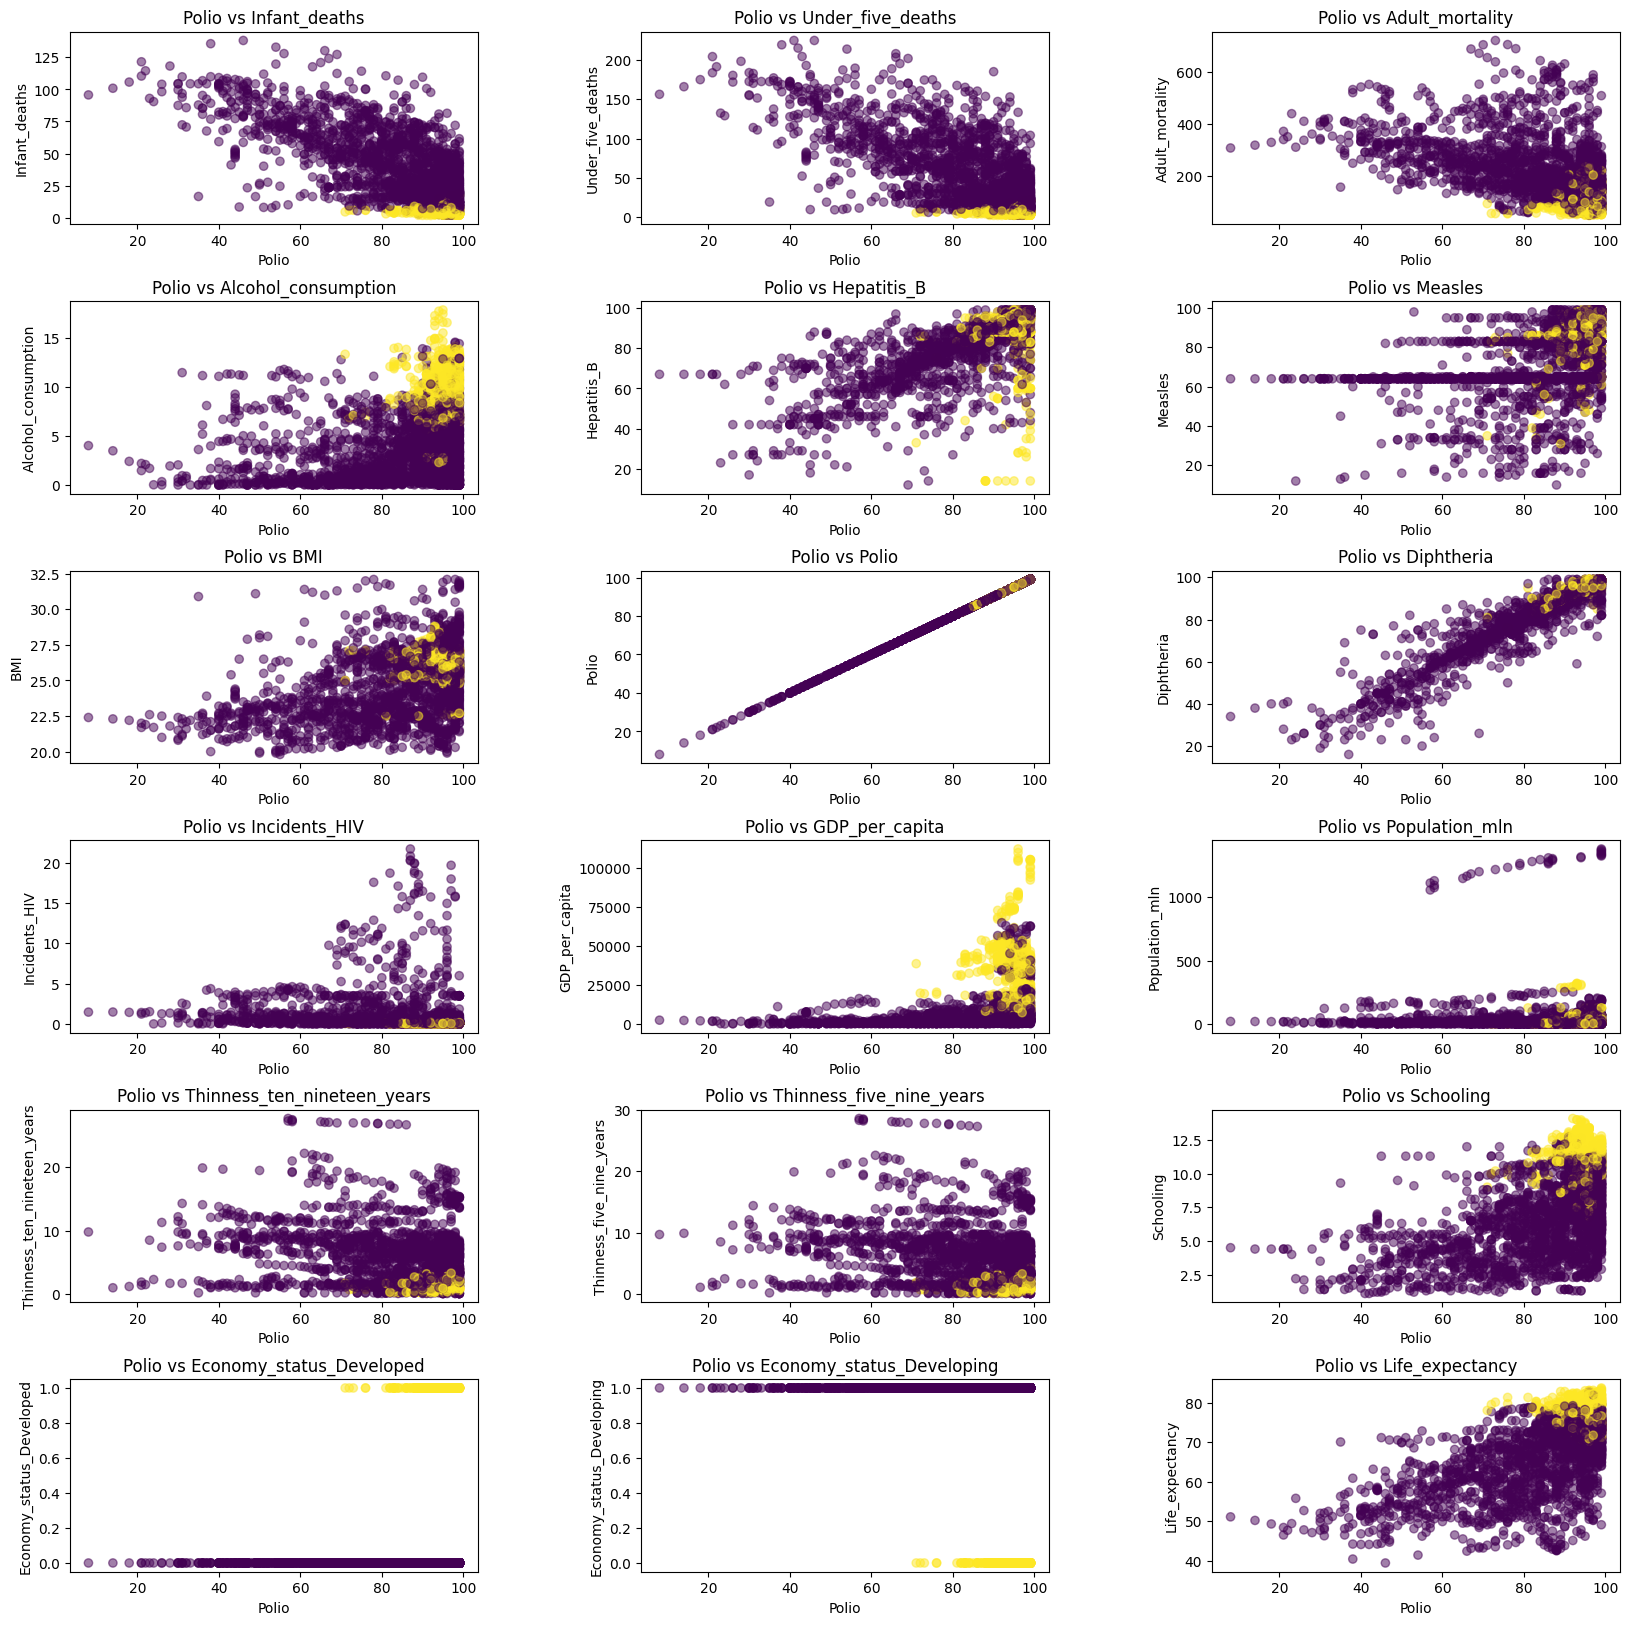

In [8]:

# Get the list of continuous data column names
columns = continuousData.columns
def CorrelationScatterplot(ax, xLabel, yLabel, data, classificationColumn):
    ax.scatter(data[xLabel], data[yLabel], c=classificationColumn, alpha=0.5)
    ax.set_title(f'{xLabel} vs {yLabel}')
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    
look_at = ["Economy_status_Developed","Life_expectancy","Year", "Measles", "BMI", "Hepatitis_B"]

X = "Polio"

#against = ["Year", "Measles", "BMI", "Hepatitis_B"]
against = dataset.columns
ignore = ["Year", "Country", "Region"]
scatter_data = dataset[[col for col in dataset.columns if col not in ignore]]
print(dataset.columns)
print(scatter_data)

# Isolating continuous data as you've done
#scatter_data = dataset[[col for col in dataset.columns if col in against]]
n = len(scatter_data.columns)

# Calculate the number of subplot rows and columns needed
# Assuming you want a square-ish layout that accommodates all pairs
num_plots = n
grid_size = 3
# Assuming scatter_data includes 'Economy_status_Developed' + columns in 'against'
#scatter_data = dataset[[X] + scatter_data]

fig, axes = plt.subplots(int(n/3),3, figsize=(20, 20))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Make sure plot_count is incremented within the loop
plot_count = 0

# The variable 'col' from the loop was being reused; let's clarify the loop variable to avoid confusion
for against_col in scatter_data.columns:
    row = plot_count // grid_size
    col = plot_count % grid_size

    # Adjusted call to CorrelationScatterplot to use the subplot axes correctly
    CorrelationScatterplot(axes[row, col], X, against_col, scatter_data, dataset["Economy_status_Developed"])

    plot_count += 1  # Increment plot_count after each plot

# Hide any unused axes if your grid size is larger than the number of plots
for i in range(plot_count, grid_size**2):
    axes.flatten()[i].set_visible(False) 
plt.show()